# Capstone Project 1: Biodiversity in National Parks
Q1 Compare status of endangered species across parks with general population

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [34]:
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [35]:
species_info

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


## Data cleaning

In [36]:
#Data cleaning steps

# Replace all NaN values in conservation_status with 'No Intervention'
species_info.conservation_status.fillna('No Intervention', inplace=True)
# remove duplicates from species_info
species_info.drop_duplicates(inplace=True, subset=['scientific_name'])
print(observations.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [37]:
# merge observations and species_info left
observations_info = pd.merge(left=observations, right=species_info, how='left', left_on='scientific_name', right_on='scientific_name')
observations_info

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention
...,...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,No Intervention
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,No Intervention
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,No Intervention
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,No Intervention


In [38]:
#group by category per park
categories_by_park = observations_info.groupby(['park_name', 'category']).observations.sum().reset_index()
categories_by_park

,park_name,category,observations
0,Bryce National Park,Amphibian,7380
1,Bryce National Park,Bird,51647
2,Bryce National Park,Fish,12423
3,Bryce National Park,Mammal,20550
4,Bryce National Park,Nonvascular Plant,32992
5,Bryce National Park,Reptile,7950
6,Bryce National Park,Vascular Plant,443083
7,Great Smoky Mountains National Park,Amphibian,5707
8,Great Smoky Mountains National Park,Bird,37728
9,Great Smoky Mountains National Park,Fish,9206


In [39]:
#exclude plants
categories_by_park_no_plants = categories_by_park[~categories_by_park.category.isin(['Vascular Plant', 'Nonvascular Plant'])]

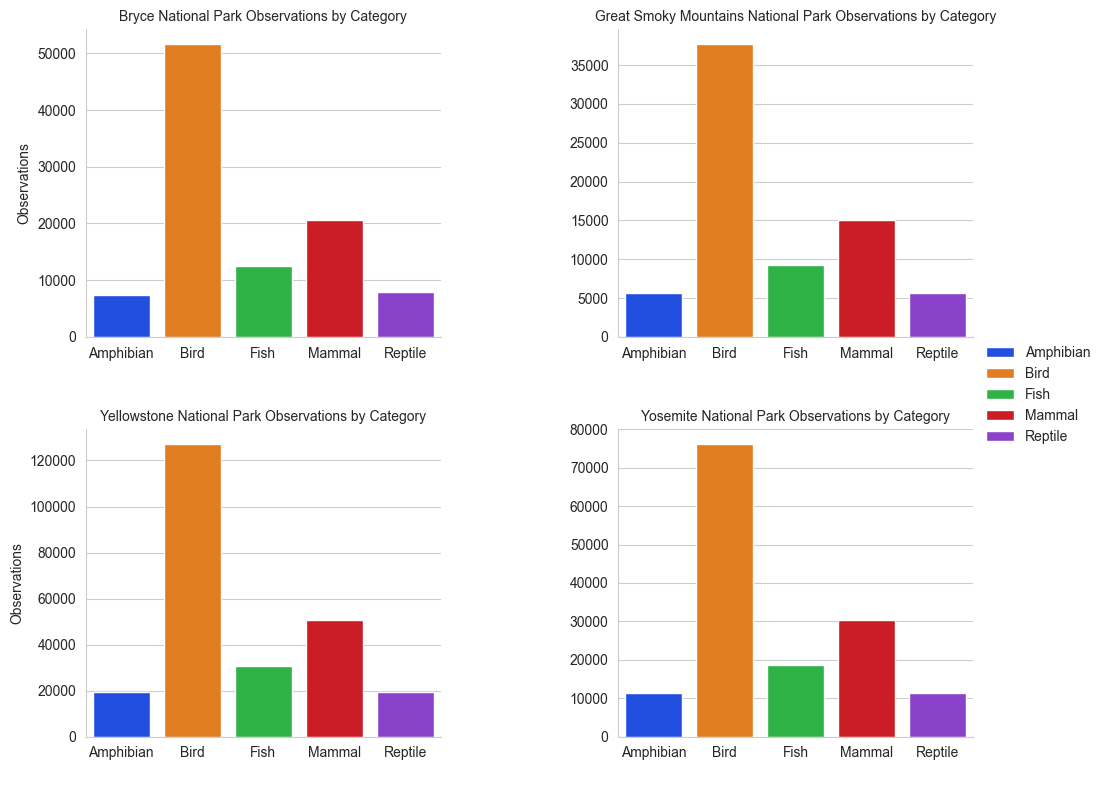

In [40]:
#park by category
grid = sns.FacetGrid(data=categories_by_park_no_plants, col='park_name', col_wrap=2, height=4, aspect=1.25, sharey=False, sharex=False)
grid.map(sns.barplot, 'category', 'observations', palette='bright', hue='category', data=categories_by_park_no_plants, order=categories_by_park_no_plants.category.unique())
grid.set_titles('{col_name} Observations by Category')
grid.set_axis_labels(' ', 'Observations')
grid.fig.subplots_adjust(hspace=0.3, wspace=0.5)
grid.add_legend()
plt.show()

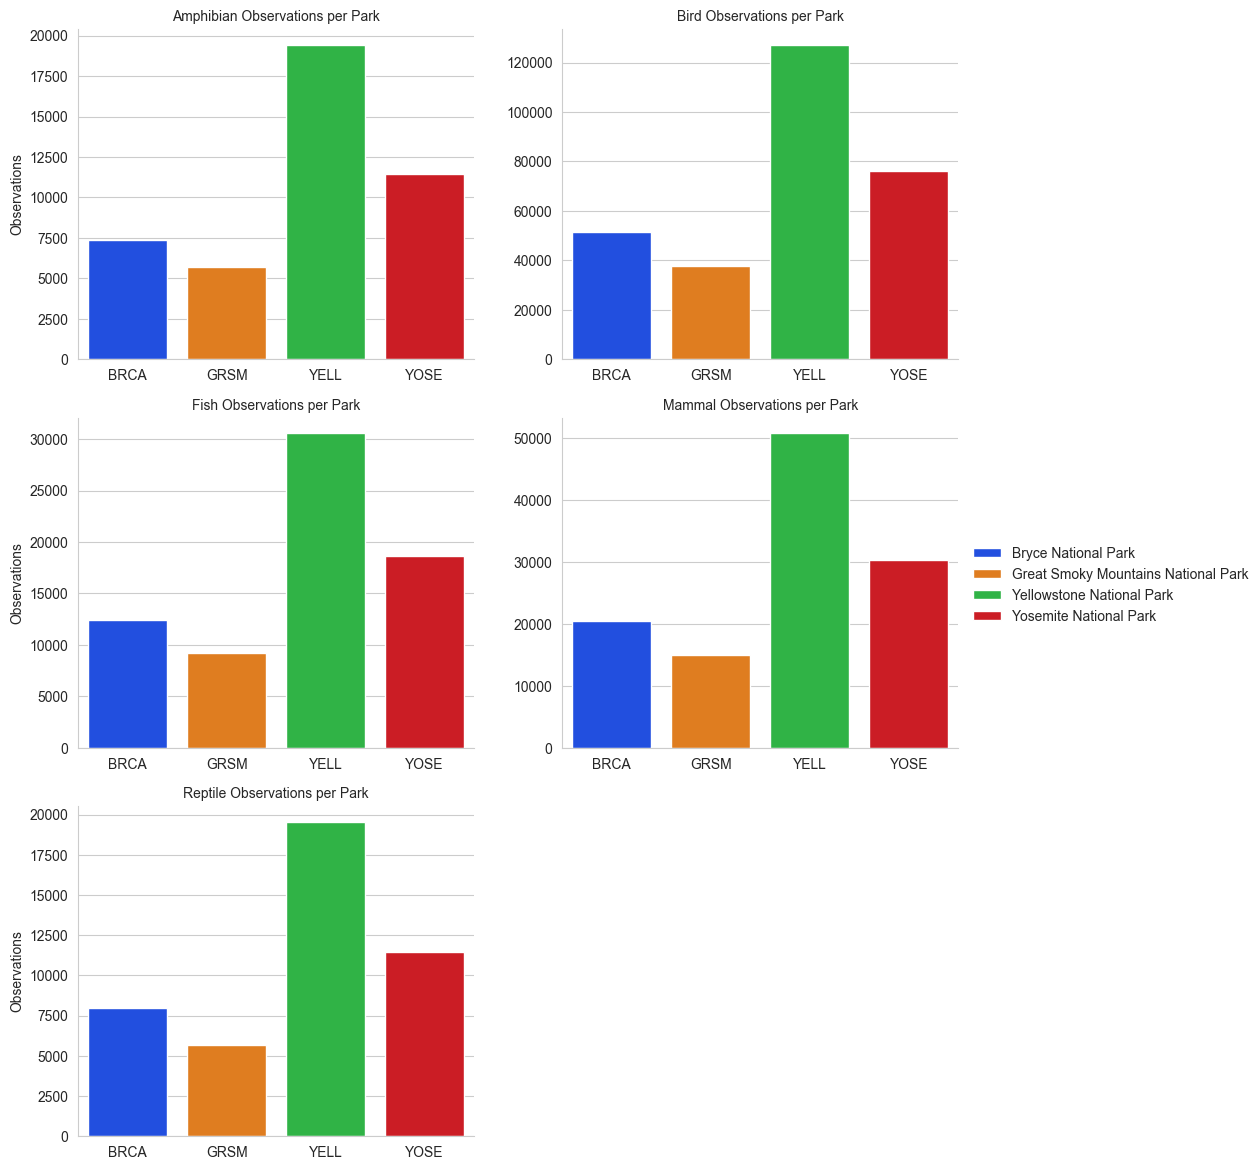

In [41]:
#category by park
grid = sns.FacetGrid(data=categories_by_park_no_plants, col='category', col_wrap=2, height=4, aspect=1.25, sharey=False, sharex=False)
grid.map(sns.barplot, 'park_name', 'observations', palette='bright', hue='park_name', data=categories_by_park_no_plants, order=categories_by_park_no_plants.park_name.unique())
grid.set_titles('{col_name} Observations per Park')
grid.set_axis_labels('', 'Observations')
plt.setp(grid.axes, xticks=[0,1,2,3] ,xticklabels=['BRCA', 'GRSM', 'YELL', 'YOSE'])
grid.add_legend()
plt.show()

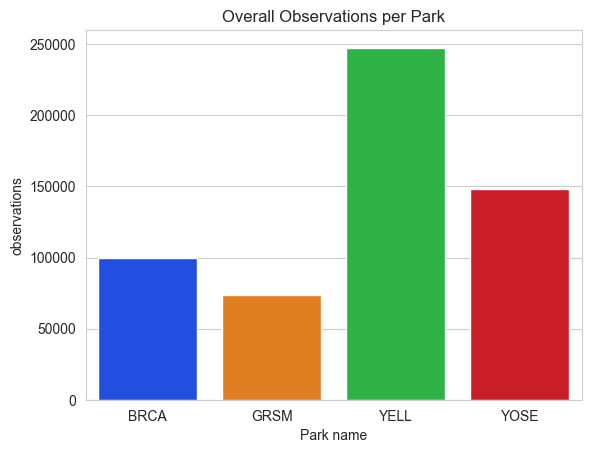

In [42]:
#population by park
population_by_park = categories_by_park_no_plants.groupby('park_name').observations.sum().reset_index()
ax = plt.subplot()
sns.barplot(data=population_by_park, x='park_name', y='observations', order=population_by_park.park_name.unique(), palette='bright', hue='park_name')
plt.title('Overall Observations per Park')
plt.xlabel('Park name')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(labels=['BRCA', 'GRSM', 'YELL', 'YOSE'])
plt.show()

In [43]:
#number of different species per park
observations_info

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention
...,...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,No Intervention
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,No Intervention
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,No Intervention
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,No Intervention


In [44]:
# show general conservation status
conservation_status = species_info.groupby('conservation_status').scientific_name.count().reset_index()
conservation_status = conservation_status[~conservation_status.conservation_status.isin(['No Intervention'])]
conservation_status

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,3
3,Species of Concern,151
4,Threatened,9


In [47]:
# show conservation status per category
conservation_status_by_category = species_info.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()
conservation_status_by_category = conservation_status_by_category[~conservation_status_by_category.conservation_status.isin(['No Intervention'])]
conservation_status_by_category

,category,conservation_status,scientific_name
0,Amphibian,Endangered,1
2,Amphibian,Species of Concern,4
3,Amphibian,Threatened,2
4,Bird,Endangered,4
5,Bird,In Recovery,3
7,Bird,Species of Concern,68
8,Fish,Endangered,3
10,Fish,Species of Concern,4
11,Fish,Threatened,3
12,Mammal,Endangered,6


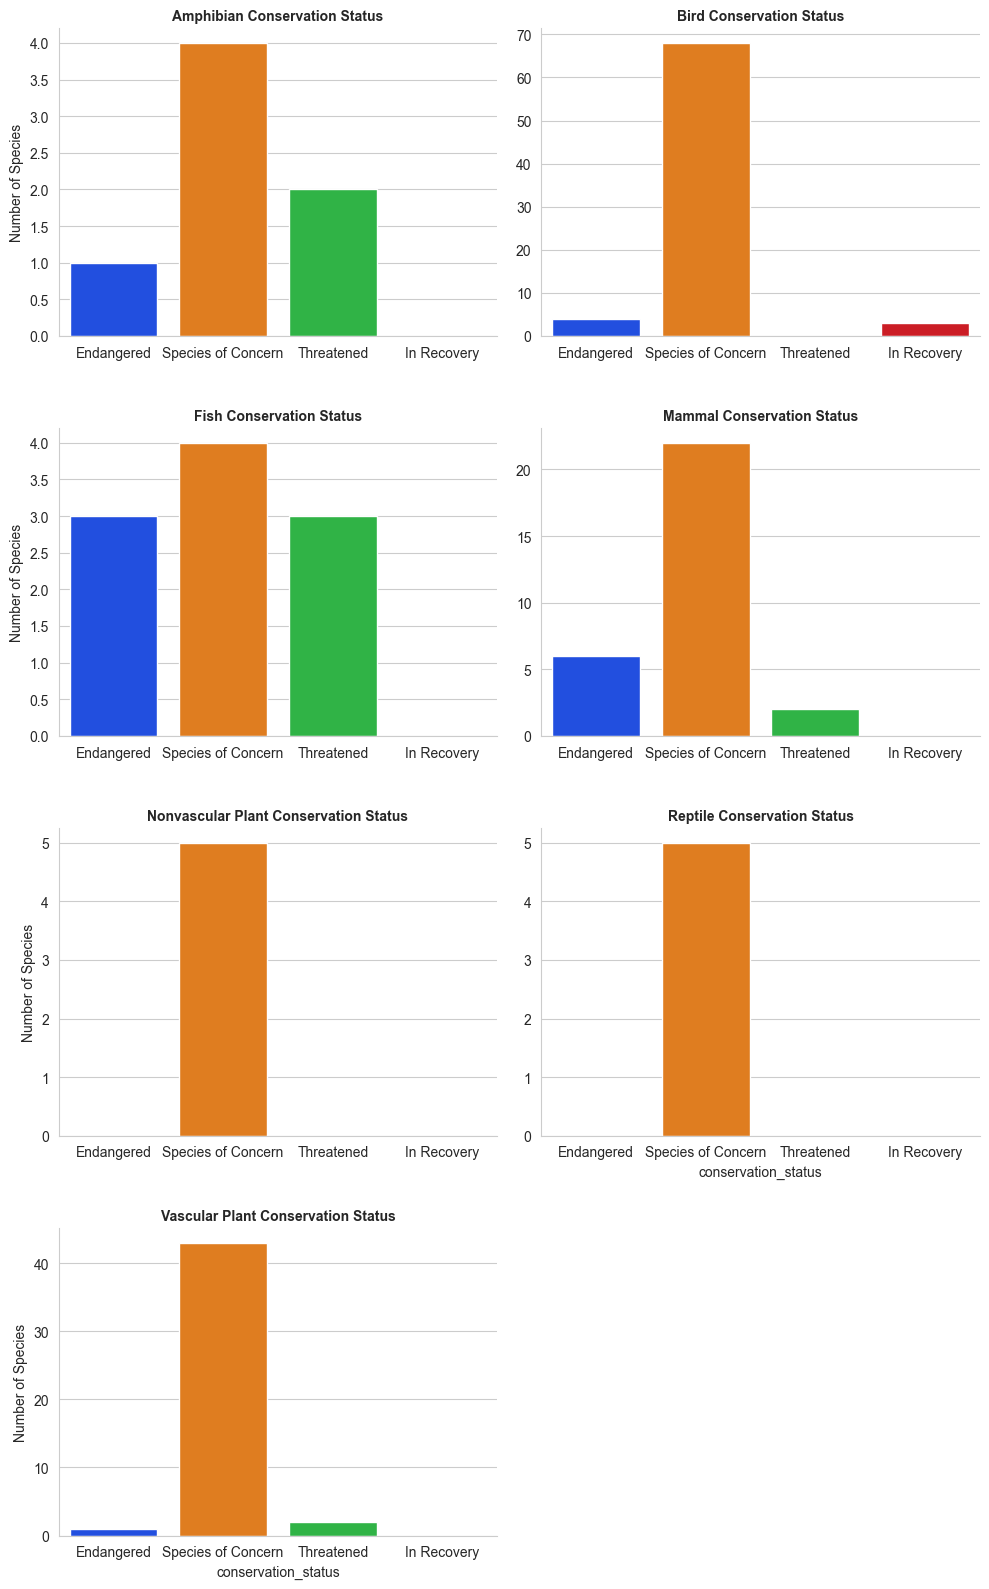

In [63]:
# create a countplot of conservation status by category
grid = sns.FacetGrid(data=conservation_status_by_category, col='category', col_wrap=2, height=4, aspect=1.25, sharey=False, sharex=False)
grid.map(sns.barplot, 'conservation_status', 'scientific_name', palette='bright', hue='conservation_status', data=conservation_status_by_category, order=conservation_status_by_category.conservation_status.unique())
grid.set_titles('{col_name} Conservation Status', fontsize=16, fontweight='bold')
grid.set_ylabels('Number of Species')
plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.show()